# Toy example 

The estimation of the parameter, $\Phi$ , can be done using the following equation: 

$\Phi = (A^{\top} A)^{-1} A^{\top} b$

The simulated equation is $z_{t} = 0.9 z_{t-1} - 0.5 z_{t-2} + \eta_t$, such that $\eta_{t} =$ noise.

<b>NOTE:</b> Yule-Walker equation is commanly used when estimating the parameters. However, it seems complicated to computed than the ordinary least square fit. 

In [1]:
import numpy as np 

point = 500
time = 100

z = np.zeros((point, time))

for i in range(0, point, 1):
    for j in range(0, time, 1):
        noise = np.random.normal(0,1)
        z[i][j] = 0.9*z[i][j-1] - 0.5*z[i][j-2] + noise #equation of the simulation 

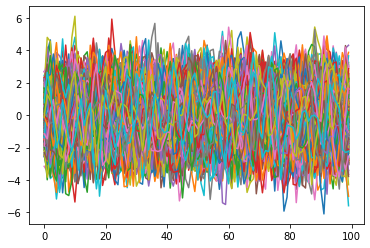

In [2]:
import matplotlib.pyplot as plt 

plt.figure()
for i in range(0, point, 1):
    plt.plot(z[i])
plt.show()

In [3]:
zmean = np.mean(z, axis=0)
a = zmean[0:-2]
b = zmean[1:-1]
A = np.vstack((a, b)).T

r = zmean[2:]

ans = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), r)

print('parameter of x2: ', ans[0], '\n', 'parameter of x1: ', ans[1])

parameter of x2:  -0.5589627185459054 
 parameter of x1:  0.9246943318112864


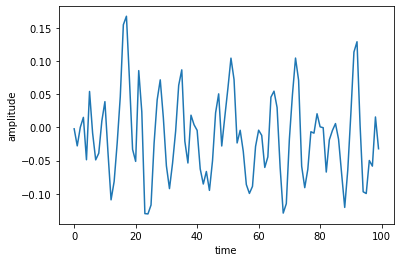

In [4]:
#plot after averaging the simulation
plt.figure()
plt.plot(zmean)
plt.ylabel('amplitude')
plt.xlabel('time')
plt.show()

# Estimate the parameters with the lags of interest. 
User can adjust the number of lags to the one that they are interested. 

The "significant lag" shown in [Autocorrelation, ACF] is used to model the Moving Average (MA) model.

The "significant lag" shown in [Partial Autocorrelation, PACF] is used to model the Autoregression (AR) model. 

<b>NOTE:</b> Refer <a href='https://www.youtube.com/watch?v=5Q5p6eVM7zM'>this</a> and <a href='https://www.youtube.com/watch?v=CAT0Y66nPhs&t=0s'>this</a> for the details. 

The whole video tutorial can be referred to <a href='https://www.youtube.com/watch?v=BSFD_snVCWI&list=PL_iP0SGUzx9RDm1hIaj1wc1YRV70vAJ7W&index=6'>this</a>

<Figure size 432x288 with 0 Axes>

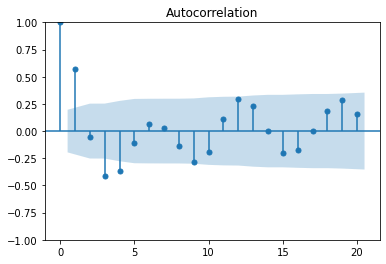

<Figure size 432x288 with 0 Axes>

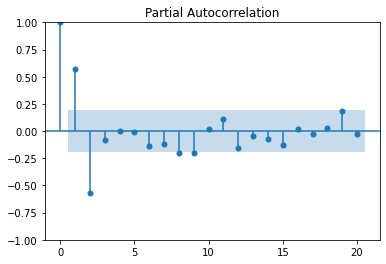

In [5]:
#check the suitable lags based on ACF and PACF
#ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure()
plot_acf(zmean)
plt.show()

#PACF
plt.figure()
plot_pacf(zmean, method='ywm')
plt.show()

Based on the PACF graph, it shows that [lag 1] and [lag 2] are enough to model the time series. Therefore, autoregressive model of 2 lags (AR(2)) is modelled. 

*ACF graph shows the rapid decays of the correlation from [lag 1] to [lag 2]. Hence, moving average (MA) is not modelled. One can try to model the series with MA(1). However, this example already shows that the model is simulated based on AR(2), so MA(1) is not shown here. Reader may try to model MA(1). Or, reader may try to model ARIMA(2,0,1)

# Estimating the parameters for any number of lags. 
The code below able to find the parameters for any lags by changing the [lag] in the code. In this case, the [lag] is set to 2. 

In [6]:
zmean = np.mean(z, axis=0)
lag = 2 #number of lags
mat=[]

for i in range(0, lag, 1):
    mat.append(zmean[i:(-lag+i)])
mat = np.array(mat)

A = np.vstack(mat).T

r = zmean[lag:]
ans = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), r)
#print('dimension of matrix A', A.shape)

for i in range(0, lag, 1):
    print(f'parameter of x{lag-i}: ', ans[i])

parameter of x2:  -0.5589627185459054
parameter of x1:  0.9246943318112864


# Simulation for two equations 
The part of the section will have two equation to be simulated: 

$X_{t} = 0.9 X_{t-1} - 0.5 X_{t-2} + \epsilon_{t}$, 

$Y_{t} = 0.8 Y_{t-1} - 0.5 Y_{t-2} + 0.16 X_{t-1} - 0.2 X_{t-2} + \eta_{t}$, 

Such that $\epsilon_{t}$ and $\eta_{t}$ are the Gaussian white noise with <b>ZERO</b> means and variance $\sigma^{2}_{11}=1$, $\sigma^{2}_{22}=0.7$, respectively. The covariance of the noises, $\sigma^{2}_{12} = \sigma^{2}_{21}$, is 0.4. Therefore, the covariance matrix of the noise can be expressed as: 

$\begin{bmatrix} \sigma^{2}_{11} & \sigma^{2}_{12} \\ \sigma^{2}_{21} & \sigma^{2}_{22} \end{bmatrix} = \begin{bmatrix} 1.0 & 0.4 \\ 0.4 & 0.7 \end{bmatrix}$

Checking <a href='https://www.youtube.com/watch?v=6Ye0CsfRDJg'>this</a> to find out how to model the VAR model. 

In [7]:
point = 500 #number of simulation
time = 1000 #length of time series

#initialize the empty matrix
x = np.zeros((point, time))
y = np.zeros((point, time))

#simulation
for i in range(0, point, 1):
    #noises' mean and covariance
    nmean = np.array([0, 0])
    ncov = np.array([[1.0, 0.4],[0.4, 0.7]])
    xnoise, ynoise = np.random.multivariate_normal(nmean, ncov, time).T
    for j in range(0, time, 1):
        x[i][j] = 0.9*x[i][j-1] - 0.5*x[i][j-2] + xnoise[j]
        y[i][j] = 0.8*y[i][j-1] - 0.5*y[i][j-3] + 0.16*x[i][j-1] - 0.2*x[i][j-2] + ynoise[j]

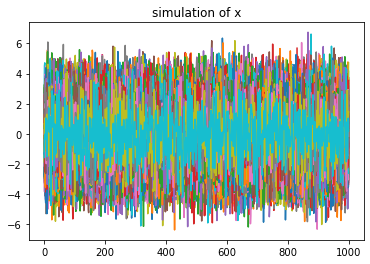

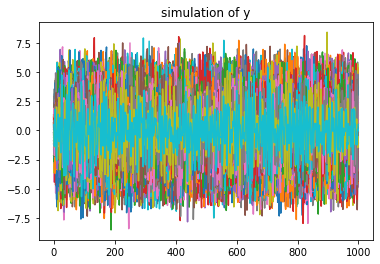

In [8]:
#plot of the simulation 
plt.figure()
for i in range(0, point, 1):
    plt.plot(x[i])
plt.title('simulation of x')
plt.show()

plt.figure()
for i in range(0, point, 1):
    plt.plot(y[i])
plt.title('simulation of y')
plt.show()

<IPython.core.display.Javascript object>


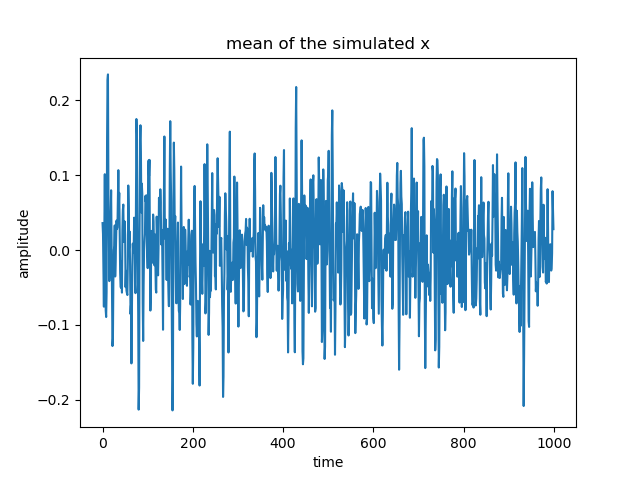

<IPython.core.display.Javascript object>


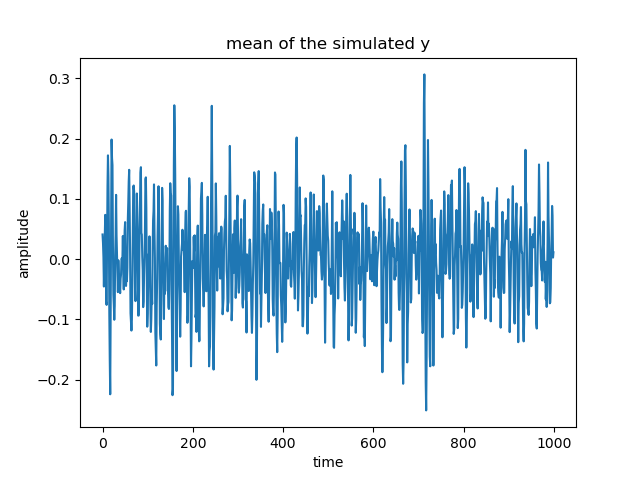

In [9]:
#plot of the mean of the simulated x and y
%matplotlib notebook
xmean = np.mean(x, axis=0)
ymean = np.mean(y, axis=0)

plt.figure()
plt.plot(xmean)
plt.title('mean of the simulated x')
plt.ylabel('amplitude')
plt.xlabel('time')
plt.show()

plt.figure()
plt.plot(ymean)
plt.title('mean of the simulated y')
plt.ylabel('amplitude')
plt.xlabel('time')
plt.show()

# Need to add-in the test on checking the stationarity, seasonality, and volatility. 
Augmented Dickey-Fuller test (AD-Fuller test) able to show the stationarity of the time series. In general, AD-Fuller test is to statistical test of a [unit root test]. Unit root test is used to indicate how strong of the trend of the time series. 

The <b>Null Hypothesis (H0)</b> of the test is [there is a unit root] and the series is [non-stationary]. 

The <b>Alternate Hypothesis (H1)</b> of the test is [there is NO unit root] and the series is [stationary]. 

The [p-value] of the test will be used to decide whether to reject or remain the [Null Hypothesis]: 

<ul>
    <li><b>p-value $>$ 0.05</b>: [Fail to reject H0]; the data has a unit root and the series is [non-stationary]. </li>
    <li><b>p-value $\leq$ 0.05</b>: [Reject the H0]; data has NO unit root and the series is [stationary]. </li>
</ul>

<b>NOTE:</b> Check <a href='https://machinelearningmastery.com/time-series-data-stationary-python/'>this</a> for the explaination on AD-Fuller test. 

In [10]:
from statsmodels.tsa.stattools import adfuller 

#AD-Fuller test for x
print('AD-Fuller test for X')
adx = adfuller(xmean)
print('ADF statistic: %f' %adx[0])
print('p-value: %f' %adx[1])
print('Critical Values: ')
for key, value in adx[4].items():
    print('\t%s: %.3f' %(key, value))

print('-'*30)
    
#AD-Fuller test for y
print('AD-Fuller test for Y')
ady = adfuller(ymean)
print('ADF statistic: %f' %ady[0])
print('p-value: %f' %ady[1])
print('Critical Values: ')
for key, value in ady[4].items():
    print('\t%s: %.3f' %(key, value))

AD-Fuller test for X
ADF statistic: -25.717809
p-value: 0.000000
Critical Values: 
	1%: -3.437
	5%: -2.864
	10%: -2.568
------------------------------
AD-Fuller test for Y
ADF statistic: -17.047130
p-value: 0.000000
Critical Values: 
	1%: -3.437
	5%: -2.864
	10%: -2.568


# Checking possible lags for the model
To determine the lags for the Autoregressive model, PACF graph is used. Any lag(s) with correlation that is beyond the 95% confidence interval (shown as the shaded blue) will be consider as statistically significant and that particular lag(s) will be implement to the model. 

<IPython.core.display.Javascript object>


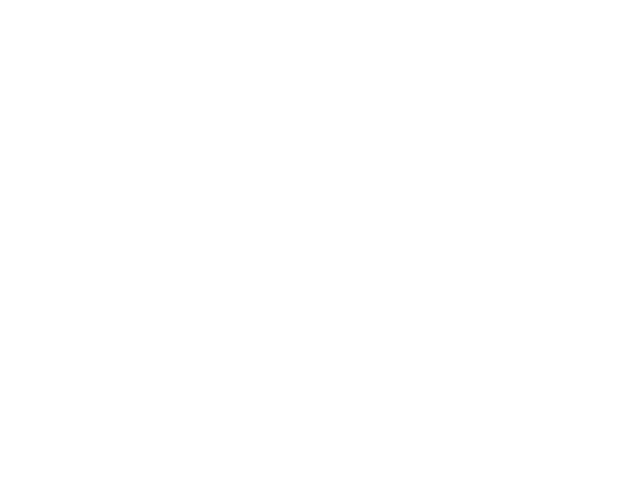

<IPython.core.display.Javascript object>


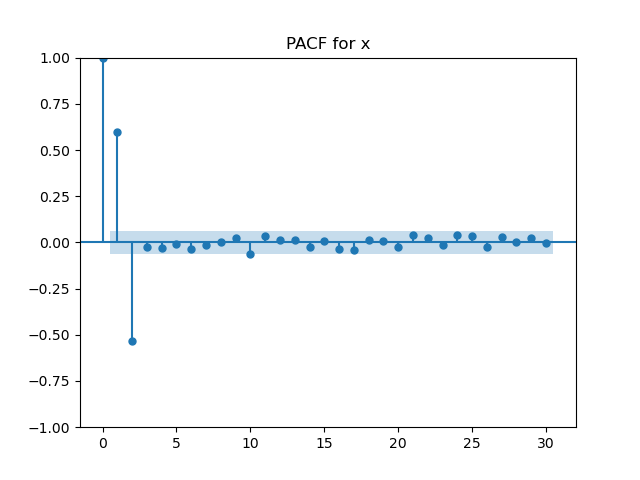

<IPython.core.display.Javascript object>


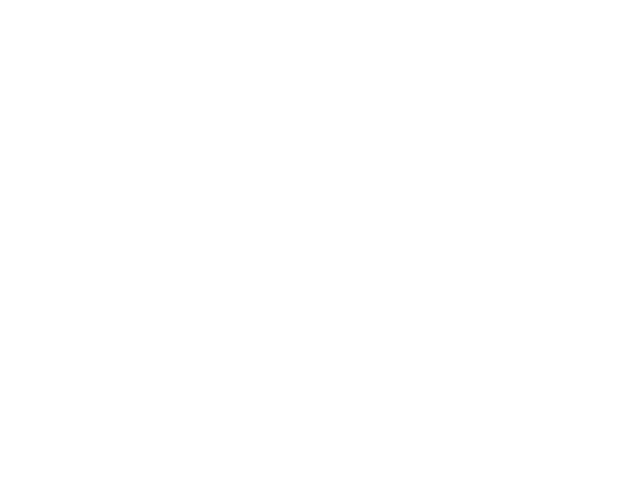

<IPython.core.display.Javascript object>


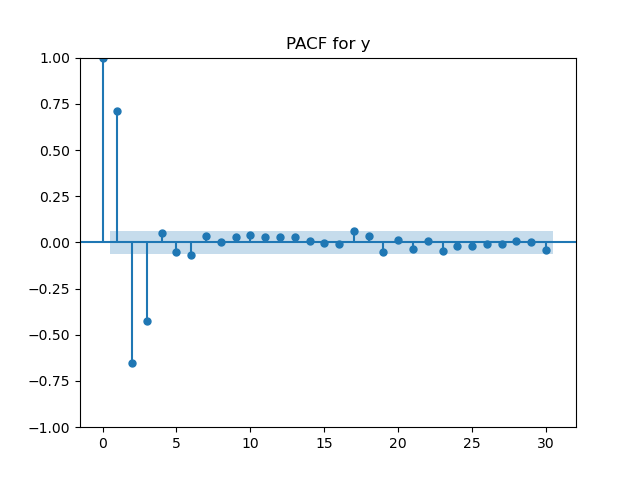

<IPython.core.display.Javascript object>


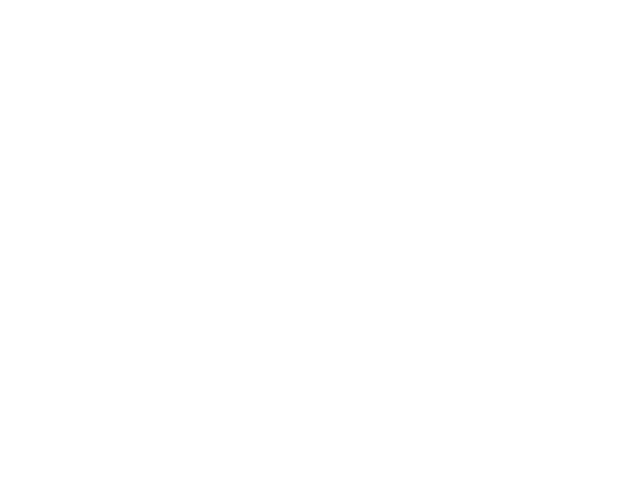

<IPython.core.display.Javascript object>


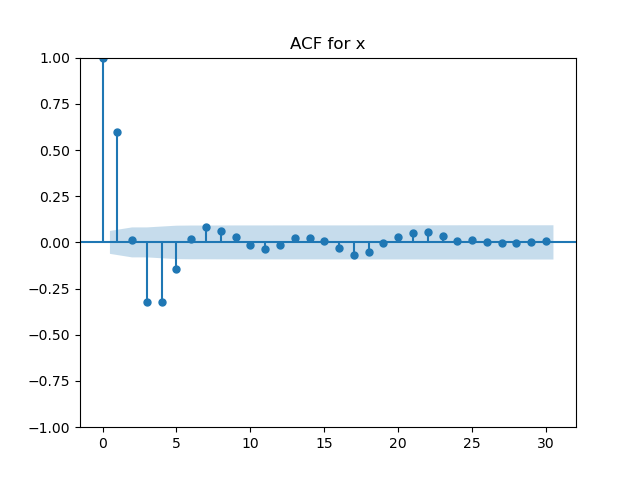

<IPython.core.display.Javascript object>


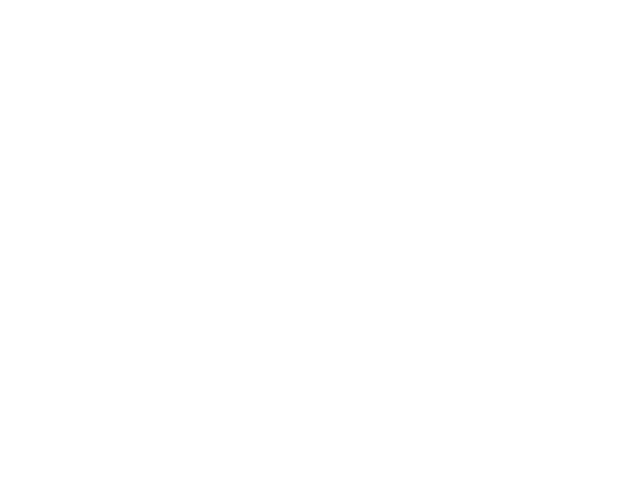

<IPython.core.display.Javascript object>


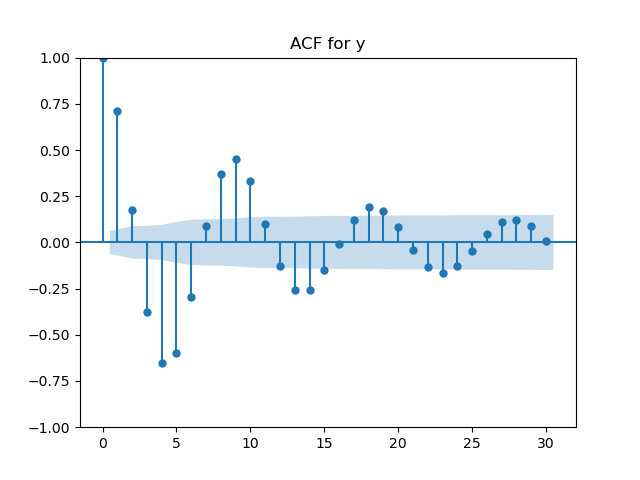

In [11]:
plt.figure()
plot_pacf(xmean, method='ywm')
plt.title('PACF for x')
plt.show()

plt.figure()
plot_pacf(ymean, method='ywm')
plt.title('PACF for y')
plt.show()

plt.figure()
plot_acf(xmean)
plt.title('ACF for x')
plt.show()

plt.figure()
plot_acf(ymean)
plt.title('ACF for y')
plt.show()

# Finding the correlation between the series and the lag of each others. 
In this case, the correlation of the y-series and x-series is determined with different lags. This reason of this step is to find out the possible lag(s) of x should be used for y-series. The correlation is evaluated by [pearson correlation] which shows the [correlation coefficient] and the [p-value of the correlation]. 

In this step, the [p-value] that is LESS THAN 0.05 should be consider as the possible lag(s).

In [12]:
from scipy.stats import pearsonr 

for lag in range(1, 15):
    yseries = ymean[lag:]
    lag_xseries = xmean[:-lag]
    print('Lag: %s' %lag)
    print(pearsonr(yseries, lag_xseries))
    print('-'*50)

Lag: 1
(0.38702443283124904, 4.804613987688104e-37)
--------------------------------------------------
Lag: 2
(0.12654507363207146, 6.102322402980382e-05)
--------------------------------------------------
Lag: 3
(-0.1941898590828081, 6.295048662126467e-10)
--------------------------------------------------
Lag: 4
(-0.38523083534903346, 1.3847138341274397e-36)
--------------------------------------------------
Lag: 5
(-0.38221324761960224, 5.8265139025239565e-36)
--------------------------------------------------
Lag: 6
(-0.19701749506698185, 3.723204435145344e-10)
--------------------------------------------------
Lag: 7
(0.04157221007301023, 0.19055627411012618)
--------------------------------------------------
Lag: 8
(0.2307691923875132, 1.8571593387271423e-13)
--------------------------------------------------
Lag: 9
(0.3019082397161649, 2.482132491006026e-22)
--------------------------------------------------
Lag: 10
(0.2328736570165139, 1.1695342737283709e-13)
------------------

# Fit a VAR model
In this section, the VAR model is fitted based on the previous "guess" of the possible lag(s). 

The result will show TWO PARTS. The first part is for [x equation] while the second part is for [y equation]. The summary of the model will display the [coefficient of the lag(s)] and the [p-value] (last column). 

Hence, the parameters for the model will be determined based on the coefficient of the lag(s) that have the p-value less than 0.05. 

In [13]:
from statsmodels.tsa.api import VAR
import pandas as pd

xy_series = np.array([xmean,ymean]).T
xy_series = pd.DataFrame(xy_series, columns=['x', 'y'])
model = VAR(xy_series)
model_fit = model.fit(10)
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Jun, 2022
Time:                     22:10:45
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.8317
Nobs:                     990.000    HQIC:                  -12.9605
Log likelihood:           3687.04    FPE:                2.17287e-06
AIC:                     -13.0395    Det(Omega_mle):     2.08354e-06
--------------------------------------------------------------------
Results for equation x
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001802         0.001417            1.272           0.203
L1.x          0.897392         0.035717           25.125           0.000
L1.y          0.008842         0.043694            0.202           0.840
L2.x         -0.506812 

# Estimating the parameters using Ordinary Least Square fit. 

In [14]:
#estimating x parameters based on the number of lags shown in PACF
lag = 2 #number of lags
mat=[]

for i in range(0, lag, 1):
    mat.append(xmean[i:(-lag+i)])
mat = np.array(mat)

A = np.vstack(mat).T

r = xmean[lag:]
ans = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), r)
#print('dimension of matrix A', A.shape)

for i in range(0, lag, 1):
    print(f'parameter of x{lag-i}: ', ans[i])

parameter of x2:  -0.5347316685944155
parameter of x1:  0.91779757975756


In [15]:
#estimating y parameters based on the number of lags shown in PACF
lag = 2 #number of lags
mat=[]

for i in range(0, lag, 1):
    mat.append(ymean[i:(-lag+i)])
mat = np.array(mat)

A = np.vstack(mat).T

r = ymean[lag:]
ans = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), r)
#print('dimension of matrix A', A.shape)

for i in range(0, lag, 1):
    print(f'parameter of y{lag-i}: ', ans[i])

parameter of y2:  -0.651421689158583
parameter of y1:  1.1700030323307575


<b>NOTE:</b> The coefficient for the AR(p) can be estimated by using ordinary least square fit or VAR modelling (from statsmodels library). However, ordinary least square fit is not a good method to estimate the coefficient for VAR(p) model as shown in the above example. 